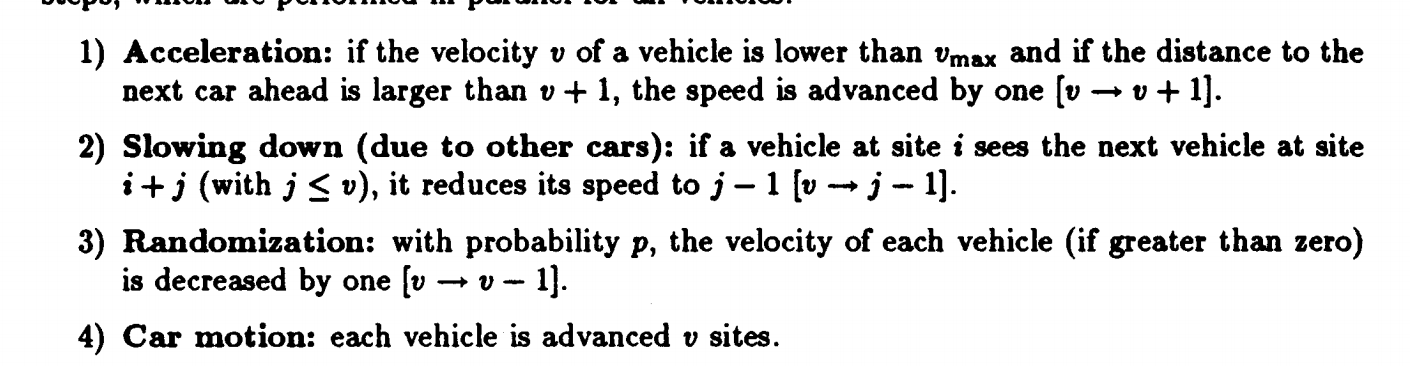

In [2]:
import numpy as np
import random

class TrafficSimulation():
    
    def __init__(self, road_length, traffic_density, max_velocity, slowdown_proba):
        
        assert type(max_velocity) is int, "Max_velocity must be an integer!"
        self.max_velocity = max_velocity
        
        assert type(road_length) is int, "Road length must be an integer!"
        self.road_length = road_length
        
        assert traffic_density >= 0 and traffic_density <=1, "Traffic density must be a proportion, 0<=x<=1"
        self.traffic_density = traffic_density
        
        assert slowdown_proba >= 0 and slowdown_proba <=1, "slowdown_proba must be a probability, 0<=x<=1"
        self.slowdown_proba = slowdown_proba
        
        #Track number of cars that have passed the boundary
        self.flow = 0
        
        #Track number of timestep the simulation has been run
        self.time = 0
        
        
        #Make road
        #Infer number of cars
        self.num_cars = np.round(road_length*traffic_density)
        num_cars = np.round(road_length*traffic_density)
        road_array = np.full(road_length, -1)
        
        car_counter = 0
        #Insert the cars with 0 velocity at random positions on the road
        while car_counter < num_cars:
            random_loc = random.randrange(0, road_length)
            if road_array[random_loc] == -1:
                road_array[random_loc] = 0
                car_counter += 1
                
        self.road = road_array
    
    
    def update_velocities(self):
        '''
        Updates velocity of each of the cars on the road
        '''
        #Make a copy to store updates on
        #next_state = self.road
        
        #Find the road location of all cars
        car_positions = np.where(self.road != -1)[0]
        #Initialize previous car
        previous_car = car_positions[-1]
        
        for car_pos in car_positions:
            
            #Accelerate car by 1, if not already at max speed
            if self.road[previous_car] < self.max_velocity:
                self.road[previous_car] += 1
            
            #Account for periodic boundary condition using mod road length
            distance = (car_pos - previous_car) % self.road_length
            
            #self.road[car_pos] is current velocity of car
            current_velocity = self.road[previous_car]
            
            #Slow down due to other cars?
            if distance <= current_velocity and current_velocity > 0:
                self.road[previous_car] = distance - 1
                
            '''
            #Accelerate?
            elif distance > current_velocity+1 and current_velocity < self.max_velocity:
                self.road[previous_car] += 1
            '''
            
            #Random slowdown?
            if random.random() <= self.slowdown_proba and current_velocity > 0:
                #print("Car randomly slowed")
                self.road[previous_car] -= 1
            
            #Make current car previous car
            previous_car = car_pos
                
    def step(self, track=False):
        '''
        Advances each car along the road by its velocity
        '''
        #Find the road location of all cars
        car_positions = np.where(self.road != -1)[0]
        
        #If we need to track flow and time, increment time
        if track:
            self.time += 1
        
        #For every car
        for car_pos in car_positions:
            
            #Find velocity of car
            velocity = self.road[car_pos]
            
            #Nothing happens if the care doesn't move
            if velocity == 0:
                continue
            
            #If we need to track flow and time car passes boundary, increment flow
            if track is True and car_pos+velocity > self.road_length:
                self.flow += 1
                
            #Next pos, given periodic boundary condition
            next_pos = (car_pos+velocity)%self.road_length
            
            #Move car to next location
            self.road[next_pos] = velocity
            
            #If previous location is not current location, reset previous location
            self.road[car_pos] = -1
    
    def display(self):
        print(''.join('.' if x == -1 else str(x) for x in self.road))

We need to make a copy of the current state, store all the updates in it but compute the correct updates using the unchanged list.

## Replicating Figure 1 from Nagel & Schreckenberg

Use the following model parameters for the first figure:
    * Road length: 100
    * Traffic density: 0.03
    * Maximum velocity: 5
    * Probability of slowing down: 0.5
    
Run for 21 iterations, displaying state at the beginning of each

In [340]:
#Intialize
my_road = TrafficSimulation(100, 0.03, 5, 0.5)


#Run 10 times without displaying state
for step in range(10):

    #Update and step
    my_road.update_velocities()
    my_road.step()

#Run 21 times, displaying 20 steps
for step in range(21):
    #Display state
    my_road.display()
    
    #Update and step
    my_road.update_velocities()
    my_road.step()

...............5.........................................0...........2..............................
...................4.....................................0..............3...........................
.......................4..................................1................3........................
...........................4...............................1..................3.....................
................................5...........................1.....................4.................
.....................................5........................2........................5............
.........................................4......................2...........................5.......
..............................................5....................3.............................5..
.4................................................4....................4............................
......5...............................................4....................4...............

## Replicating Figure 2 from Nagel & Schreckenberg

Use the following model parameters for the first figure:
    * Road length: 100
    * Traffic density: 0.1
    * Maximum velocity: 5
    * Probability of slowing down: 0.5
    
Run for 20 iterations, displaying state at the beginning of each

In [352]:
#Intialize
my_road = TrafficSimulation(100, 0.1, 5, 0)

#Run 10 times without displaying state
for step in range(5):

    #Update and step
    my_road.update_velocities()
    my_road.step()

#Run 21 times, displaying 20 steps
for step in range(21):    
    
    #Update and step
    my_road.step()
    my_road.update_velocities()
    
    my_road.display()

.......4.....4....5......5.......5......................4.....5......5.......5........5.............
...........5.....5.....5......5.......5.....................5......5......5.......5........5........
................5.....5.....5......5.......5.....................5......5......5.......5........5...
.5...................5.....5.....5......5.......5.....................5......5......5.......5.......
......5...................5.....5.....5......5.......5.....................5......5......5.......5..
..5........5...................5.....5.....5......5.......5.....................5......5......5.....
.......5........5...................5.....5.....5......5.......5.....................5......5......5
....5.......5........5...................5.....5.....5......5.......5.....................5......5..
..5......5.......5........5...................5.....5.....5......5.......5.....................5....
5......5......5.......5........5...................5.....5.....5......5.......5............

# Reproducing Figure 4 from the Nagel & Schreckenberg.

We plot traffic flow as a function of road density.

Traffic flow rate is defined as the average number of cars passing per unit time between
two particular cells — any two cells will do, but the periodic boundary is a convenient
location. This is Equation 4 in the reading.
    * You can simply count the number of cars that exit the road on the right hand side and re-enter on the left hand side in each time step.
    * The flow rate is the average of these counts over time

In [3]:
flow_rate_list = []
density_list = [x/100 for x in range(5, 80, 1)]

for density in density_list:
    #Intialize road with density
    my_road = TrafficSimulation(100, density, 5, 0)
    temp_list = []
    
    #Average flow_rates over 100 simulations per density
    for runs in range(20):
        
        #Run 10 times to initialize, w/o tracking flow and time
        for step in range(5):

            #Update and step
            my_road.update_velocities()
            my_road.step()

        #Run 200 times, tracking flow and time
        for step in range(200):

            #Update and step, tracking flow and time
            my_road.update_velocities()
            my_road.step(track=True)
        
        #temp_list.ap pend((my_road.flow/my_road.num_cars)/my_road.time)
        temp_list.append(my_road.flow/my_road.time)

    
    flow_rate_list.append(temp_list)

In [30]:
average_flow_rate_list = [np.mean(x) for x in flow_rate_list]
len(average_flow_rate_list) == len(density_list)

True

In [4]:
long_density_list = []
for dens in density_list:
    for _ in range(20):
        long_density_list.append(dens)

In [5]:
flat_flow_rate_list = list(np.array(flow_rate_list).flatten())
flat_flow_rate_list

[0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.295,
 0.2975,
 0.29833333333333334,
 0.29875,
 0.299,
 0.2991666666666667,
 0.29928571428571427,
 0.299375,
 0.29944444444444446,
 0.2995,
 0.29954545454545456,
 0.2995833333333333,
 0.2996153846153846,
 0.29964285714285716,
 0.2996666666666667,
 0.2996875,
 0.29970588235294116,
 0.2997222222222222,
 0.29973684210526313,
 0.29975,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.45,
 0.45,
 0.45,
 0.

In [6]:
import matplotlib.pyplot as plt

#Visualize
plt.figure(figsize=(12, 8))
plt.plot(long_density_list, flat_flow_rate_list)
plt.plot(density_list, average_flow_rate_list)
plt.title("Traffic Flow vs Traffic density")
plt.xlabel("Traffic density")
plt.ylabel("Traffic flow")
plt.show()

NameError: name 'average_flow_rate_list' is not defined

In [ ]:
# Simulate higher traffic density to see traffic jams forming
traffic_flows = []
traffic_flows_conf95 = []
densities = np.arange(0, 1, 0.1)
epoches = 10
for density in densities:
    traffic_flow = []
    for _ in range(epoches):
        sim = TrafficSimulation(car_density=density)
        for i in range(50):
            sim.step()
        traffic_flow.append(sim.cumulative_traffic_flow / sim.time_step)
    
    traffic_flows.append(sum(traffic_flow) / epoches)
    traffic_flows_conf95.append((np.percentile(traffic_flow, 97.5)-np.percentile(traffic_flow, 2.5))/2)

plt.errorbar(densities, traffic_flows, yerr=traffic_flows_conf95, capsize=2)

In [6]:
class TrafficSimulation:

    def __init__(self, length=100, car_density=0.2, slow_down_prob=0.5, max_speed=5):
        '''
        Create a new traffic simulation object. Cars are distributed randomly
        along the road and start with random velocities.

        Inputs:

            length (int) The number of cells in the road. Default: 100.

            car_density (float) The fraction of cells that have a car on them.
              Default: 0.2.

            slow_down_prob (float) The probability that a car will randomly
              slow down by 1 during an update step. Default: 0.5.

            max_speed (int) The maximum speed in car cells per update step.
              Default: 5.
        '''
        self.length = length
        self.car_density = car_density
        self.max_speed = max_speed
        self.slow_down_prob = slow_down_prob

        # Track the time steps and total number of cars that passed the simulation
        # boundary to estimate average traffic flow.
        self.time_step = 0
        self.cumulative_traffic_flow = 0

        random_indexes = np.random.choice(
            range(self.length),
            size=int(round(car_density * self.length)),
            replace=False)
        self.state = -np.ones(self.length, dtype=int)  # -1 means empty cell
        self.state[random_indexes] = np.random.randint(
            0, self.max_speed + 1, size=len(random_indexes))

    def step(self):
        '''
        Advance one time step in the simulation.
        '''

        # Update car velocities.
        for i in range(self.length):
            if self.state[i] != -1:
                distance = 1  # The number of empty cells between this car and the next plus 1
                while self.state[(i + distance) % self.length] == -1:
                    distance += 1
                # Acceleration
                if self.state[i] < self.max_speed:
                    self.state[i] += 1
                # Deceleration
                if self.state[i] >= distance:
                    self.state[i] = distance - 1
                # Randomization
                if (self.state[i] > 0) and (np.random.uniform() < self.slow_down_prob):
                    self.state[i] -= 1

        if display:
            self.display()

        # Move cars forward using their new velocities
        new_state = -np.ones(self.length, dtype=int)
        for i in range(self.length):
            if self.state[i] != -1:
                new_state[(i + self.state[i]) % self.length] = self.state[i]
        self.state = new_state

        # Update time and traffic flow
        self.time_step += 1
        for i in range(self.max_speed):
            if self.state[i] > i:
                self.cumulative_traffic_flow += 1

    def display(self):
        '''
        Print out the current state of the simulation.
        '''
        print(''.join('.' if x == -1 else str(x) for x in self.state))

Model extension ideas

Other ways of measuring whether traffic is good or bad:
Traffic flow
Count accidents
Length of traffic jams
Time to travel from start to end of road (high average speed)
Variation in velocity
Overall average speed of all cars on the road
Proportion of stationary cars

Extensions to the traffic model to make it more realistic:
Intersections – 2-d grid with road cells and non-road cells
More lanes
Different max speeds for different cars: old car vs modern sports car
Probability of collisions

Extensions to the driver behavior model to make it more realistic:
Probability of slowdown can be dynamic – time of day / animals on the road
